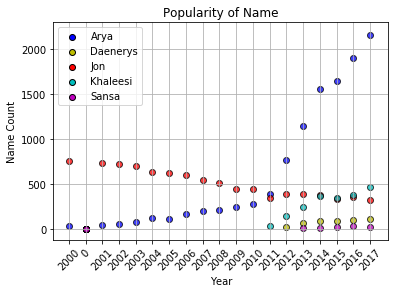

In [1]:
%matplotlib inline

import pandas as pd
import os
from matplotlib import pyplot as plt
import requests
import json


# a list to hold all instances where Arya is Female in .txt files. Loop through this list to create scatter plot
# add (name, gender, color) to got_names list to add to scatter plot
got_names = [("Arya","F","b"),
             ("Daenerys","F","y"),
             ("Jon","M","r"),
             ("Khaleesi","F","c"),
             ("Sansa","F","m")
            ]
# go through each file in 'names' folder, if 'yob20' is in the filename, put the file in a DF called name_df
for filename in os.listdir("Resources/names"):
    if 'yob20' in filename:
        name_file = pd.read_csv(f"Resources/names/{filename}",header=None)
        name_df = pd.DataFrame(name_file)
        name_df = name_df.rename(columns={0:'Name', 1:'Gender',2:'Birth Count'})
# add a year column to the DF based on the filename(ex. add 2005 to year column for yob2005.txt)
        name_df["Year"] = os.path.splitext(filename)[0][-4:]
# find the name in the current file and plot the point
        for name in got_names:
            year = str(name_df[(name_df["Name"]==f"{name[0]}") & (name_df["Year"] != "0") & (name_df["Gender"] == f"{name[1]}")]['Year'].sum())
            count = name_df[(name_df["Name"]==f"{name[0]}") & (name_df["Gender"] == f"{name[1]}")]["Birth Count"].sum()
            if year != 0:
                plt.scatter(year,count,c=f"{name[2]}",edgecolor=(0,0,0),alpha=0.75)

handles = [plt.scatter([],
                     [],
                     marker="o",
                     color=name[2],
                     label=name[0],
                     edgecolor=(0,0,0)) for name in got_names]
plt.legend(handles=handles,
           markerscale=1)
# rotate years, add title and x/y labels    
plt.xticks(rotation=45)
plt.title("Popularity of Name")
plt.xlabel("Year")
plt.ylabel("Name Count")
plt.grid()
plt.show()

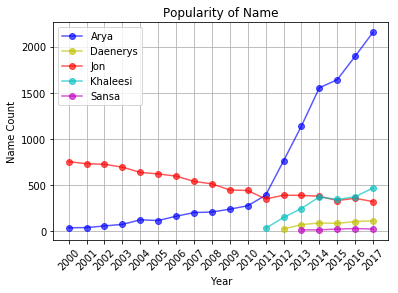

In [2]:
# a list to hold all instances where Arya is Female in .txt files. Loop through this list to create scatter plot
# add (name, gender, color) to got_names list to add to scatter plot
got_names = [("Arya","F","b"),
             ("Daenerys","F","y"),
             ("Jon","M","r"),
             ("Khaleesi","F","c"),
             ("Sansa","F","m")
            ]
arya = []
daenerys = []
jon = []
khaleesi = []
sansa = []
total_counts = []
averages = []
# go through each file in 'names' folder, if 'yob20' is in the filename, put the file in a DF called name_df
for filename in os.listdir("Resources/names"):
    if 'yob20' in filename:
        name_file = pd.read_csv(f"Resources/names/{filename}",header=None)
        name_df = pd.DataFrame(name_file)
        name_df = name_df.rename(columns={0:'Name', 1:'Gender',2:'Birth Count'})
# add a year column to the DF based on the filename(ex. add 2005 to year column for 2005.txt)
        name_df["Year"] = os.path.splitext(filename)[0][-4:]
        total_counts.append(name_df[name_df["Year"]==f'{name_df["Year"][0]}']["Birth Count"].sum())
        averages.append([os.path.splitext(filename)[0][-4:],name_df["Birth Count"].mean()])
# find the name in the current file and plot the point
        for name in got_names:
            character = name[0]
            year = str(name_df[(name_df["Name"]==f"{name[0]}") & (name_df["Year"] != "0") & (name_df["Gender"] == f"{name[1]}")]['Year'].sum())
            birth_count = name_df[(name_df["Name"]==f"{name[0]}") & (name_df["Gender"] == f"{name[1]}")]["Birth Count"].sum()
            if year != '0':
                if character == "Arya":
                    arya.append([year,birth_count,'b'])
                elif character == "Daenerys":
                    daenerys.append([year,birth_count,'y'])
                elif character == "Jon":
                    jon.append([year,birth_count,'r'])
                elif character == "Khaleesi":
                    khaleesi.append([year,birth_count,'c'])
                elif character == "Sansa":
                    sansa.append([year,birth_count,'m'])

aryadf = pd.DataFrame(arya, columns=["Year","Birth Count","Color"])
daenerysdf = pd.DataFrame(daenerys, columns=["Year","Birth Count","Color"])
jondf = pd.DataFrame(jon, columns=["Year","Birth Count","Color"])
khaleesidf = pd.DataFrame(khaleesi, columns=["Year","Birth Count","Color"])
sansadf = pd.DataFrame(sansa, columns=["Year","Birth Count","Color"])



dflist = [aryadf, daenerysdf, jondf, khaleesidf, sansadf]
for df, name in zip(dflist, got_names):
    plt.plot(df["Year"],df["Birth Count"], marker='o', label=name[0], alpha=.65, c=f"{df['Color'][0]}")
plt.legend()
# rotate years, add title and x/y labels    
plt.xticks(rotation=45)
plt.title("Popularity of Name")
plt.xlabel("Year")
plt.ylabel("Name Count")
plt.grid()
plt.savefig("Graph_Images/GoT/mixed_GOT_names.png")
plt.show()

In [3]:
averagedf = pd.DataFrame(averages)
averagedf = averagedf.rename(columns={0:"Year",1:"name(average)"})

In [4]:
averagedf

,Year,name(average)
0,2000,126.913198
1,2001,123.606693
2,2002,122.240683
3,2003,121.860341
4,2004,119.152500
5,2005,118.048424
6,2006,115.982982
7,2007,114.277740
8,2008,111.957742
9,2009,109.954412


In [5]:
# the above is the average number of babies born with the same name in given year.
# (ex. Each name, on average, had 110 people born with it in 2016)
# this can be used to compare the amount of people with an average to our GOT names.


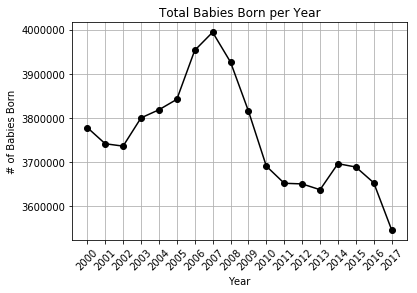

In [6]:
plt.plot(averagedf["Year"],total_counts, marker='o', c="k")
plt.xticks(rotation=45)
plt.title("Total Babies Born per Year")
plt.xlabel("Year")
plt.ylabel("# of Babies Born")
plt.grid()
plt.savefig("Graph_Images/GoT/babies_born_per_year.png")
plt.show()
# interesting note: Sharp change in babies born per year around '07. Possibly due to finacial crisis?

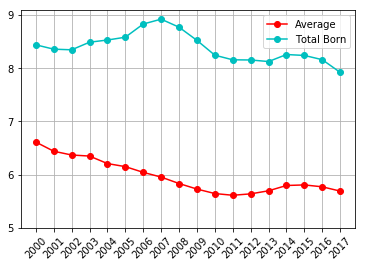

In [46]:
def norm(data):
    return (data)/(max(data)-min(data))
plt.plot(aryadf["Year"],norm(averagedf["name(average)"]), marker='o', c="r",label='Average')
plt.plot(averagedf["Year"],norm(total_counts), marker='o', c="c",label='Total Born')
plt.xticks(rotation=45)
plt.grid()
plt.yticks(range(5,10))
plt.legend()

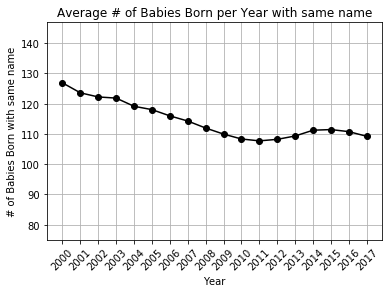

In [7]:
plt.plot(aryadf["Year"],averagedf["name(average)"], marker='o', c="k")
plt.xticks(rotation=45)
plt.ylim(75,averagedf["name(average)"].max()+20)
plt.title("Average # of Babies Born per Year with same name")
plt.xlabel("Year")
plt.ylabel("# of Babies Born with same name")
plt.grid()
plt.savefig("Graph_Images/GoT/average_name_use.png")
plt.show()

In [8]:
aryadf = aryadf.drop('Color',axis=1)
jondf = jondf.drop('Color',axis=1)
sansadf = sansadf.drop('Color',axis=1)
daenerysdf = daenerysdf.drop('Color',axis=1)
khaleesidf = khaleesidf.drop('Color',axis=1)

In [9]:
aryadf

,Year,Birth Count
0,2000,34
1,2001,36
2,2002,54
3,2003,71
4,2004,120
5,2005,113
6,2006,159
7,2007,199
8,2008,205
9,2009,236


In [10]:
jondf

,Year,Birth Count
0,2000,752
1,2001,729
2,2002,723
3,2003,692
4,2004,635
5,2005,618
6,2006,595
7,2007,537
8,2008,511
9,2009,444


In [11]:
sansadf

,Year,Birth Count
0,2013,11
1,2014,12
2,2015,20
3,2016,26
4,2017,20


In [12]:
daenerysdf

,Year,Birth Count
0,2012,21
1,2013,68
2,2014,86
3,2015,82
4,2016,101
5,2017,110


In [13]:
khaleesidf

,Year,Birth Count
0,2011,28
1,2012,146
2,2013,243
3,2014,369
4,2015,341
5,2016,371
6,2017,466


In [14]:
def compareToAverage(namedf, label=None, title=None):
    """namedf = A dataframe with Year and Birth count columns"""
    k = plt.bar(namedf["Year"].astype(int),namedf["Birth Count"],.45,label=label)
    a = plt.bar(namedf["Year"].astype(int)+.45, averagedf['name(average)'][-len(namedf):],.45,label="Average")
    plt.subplot().set_xticks(namedf["Year"].astype(int) + .45 / 2)
    plt.subplot().set_xticklabels(namedf["Year"])
    plt.xticks(rotation=45)
    plt.xlabel("Year")
    plt.ylabel("Name Count")
    plt.title(title)
    plt.legend()

C:\Users\josep\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


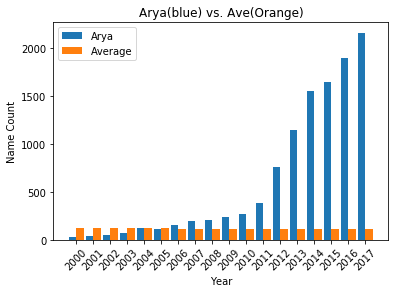

In [15]:
compareToAverage(aryadf, label="Arya",title="Arya(blue) vs. Ave(Orange)")
plt.savefig("Graph_Images/GoT/arya_vs_average.png")

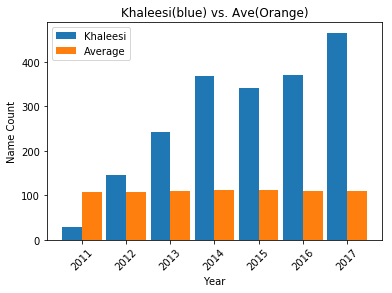

In [16]:
compareToAverage(khaleesidf, label="Khaleesi",title="Khaleesi(blue) vs. Ave(Orange)")
plt.savefig("Graph_Images/GoT/khaleesi_vs_average.png")

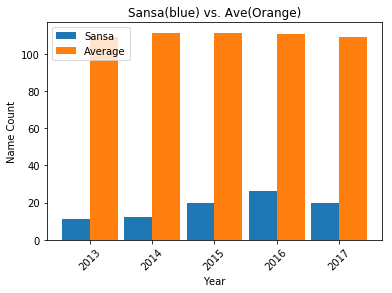

In [48]:
compareToAverage(sansadf, label="Sansa",title="Sansa(blue) vs. Ave(Orange)")
plt.savefig("Graph_Images/GoT/sansa_vs_average.png")

C:\Users\josep\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


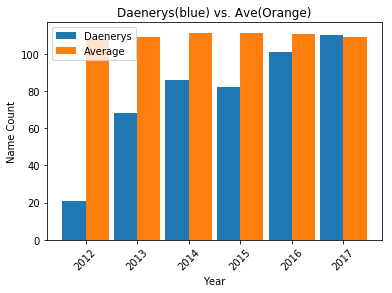

In [47]:
compareToAverage(daenerysdf, label="Daenerys",title="Daenerys(blue) vs. Ave(Orange)")
plt.savefig("Graph_Images/GoT/Daenerys_vs_average.png")

In [30]:
def plotList(names, gender, marker='o',alpha=0.65, yob='yob20'):
    """names = a list of names
       gender = a single string character, either 'F', or 'M' to respresent female or male respectively
       """
    df = pd.DataFrame()
    for filename in os.listdir("Resources/names"):
        if yob in filename:
            name_file = pd.read_csv(f"Resources/names/{filename}",header=None)
            name_df = pd.DataFrame(name_file)
            name_df = name_df.rename(columns={0:'Name', 1:'Gender',2:'Birth Count'})
# add a year column to the DF based on the filename(ex. add 2005 to year column for yob2005.txt)
            name_df["Year"] = os.path.splitext(filename)[0][-4:]
# find the name in the current file and plot the point
            name_df = name_df[name_df["Gender"]==gender]
            df = df.append(name_df)


    gotDF = df[df["Name"].isin(names)]
    for name in names:
        plt.plot(sorted(gotDF[gotDF["Name"]==f"{name}"]["Year"]),gotDF[gotDF["Name"]==f"{name}"]["Birth Count"],marker=marker,alpha=alpha)
    plt.xticks(rotation=45)
    plt.grid()
    plt.legend(labels=names)

In [20]:
url = "https://anapioficeandfire.com/api/"

#Possible url titles:
## - /Books/
## - /Characters/
## - /Houses/
female_names = []
#request Copy/paste 2 lines into new blocks
females = {"Arya": 148,
           "Arienne": 130,
           "Asha":150,
           "Brienne":216,
           "Cersei": 238}
colors = ['b','r','y','c','m']
for female,color in zip(females.values(),colors):
    response = requests.get(f"{url}Characters/{female}").json()['name'].split()[0]

    female_names.append(response)
female_names

['Arya', 'Arianne', 'Asha', 'Brienne', 'Cersei']

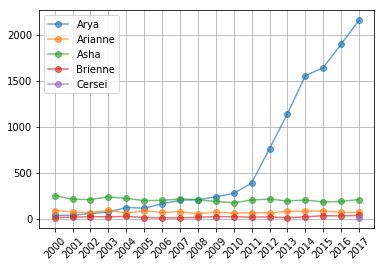

In [21]:
plotList(female_names,"F")

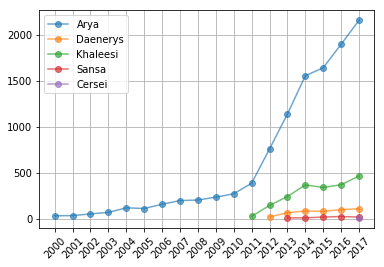

In [22]:
names = ["Arya",
         "Daenerys",
         "Khaleesi",
         "Sansa",
         "Cersei"]data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYAAAAELCAYAAADQsFGkAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzs3XmcFNW5+P/P6X2dfWFggAEBkX0TUYmCcgH1xi1qxCRqolETvyZ+sxtNNDExMXmZ682e63XLN97x59VgNDGIC2hckE1FZBcGGBhm61l6X8/vj+ppBhiYYRZ6lucN9erq09Wnnu6pPk/V6epTSmuNEEKIoceU7QCEEEJkhyQAIYQYoiQBCCHEECUJQAghhihJAEIIMURJAhBCiCFKEoAQQgxRkgCEEGKIkgQghBBDlCXbAZxIUVGRrqio6Pbzg8Egbre7x3H0Rj39KRapR+rpD/X0p1gGWz0bNmxo0FoXd7qg1rrfTrNnz9Y9sWrVqh49vzfr6U+xSD1ST3+opz/FMtjqAdbrLrSx0gUkhBBDlCQAIYQYoiQBCCHEENWvvwTuSDwep7q6mkgk0umyubm5bN26tcfr7I16TnUsDoeD8vJyrFZrj9cphBicBlwCqK6uxuv1UlFRgVLqhMv6/X68Xm+P19kb9ZzKWLTWNDY2Ul1dzZgxY3q8TiHE4DTgEkAkEulS4z+UKaUoLCykvr4+26EIIU7S+ioflWv38dGeMC/WfcCyuaOYU1HQJ+sakN8BSOPfOXmPhBh41lf5eHDFNnzBGPl28AVjPLhiG+urfH2yvgGZAIQQYjCqXLsPj91CPJnCHwevw4rHbqFy7b4+WZ8kgB5Yvnw5Sim2bduW7VCEEIPAPl8Yi0mxtzFEa1QDGo/dwn5fuE/WN+gTwPoqH9985gOu/uO7fPOZD3r1UKqyspL58+fz9NNPH/NYMpnstfUIIYaGEflOttf6MSlFqdsEKALRBCMLnH2yvkGdAN7f35LpTxuWY+/V/rRAIMDbb7/No48+mkkAq1evZuHChVx33XVMnTqVH/zgB/znf/5n5jl33303v/71rwkEAlx44YXMmjWLqVOn8re//a3H8QghBr5hXjuBSJJirx2L0vgjcQLRBMvmjuqT9Q24s4Dae25DNQeaj39o9I8PDxBNaVojiUxZNJHkh3/bzNIpZR0+Z0Sek8/MLu903c8//zxLly5lwoQJFBQUsHHjRgDWrl3L5s2bGTNmDFVVVVx55ZV8/etfJ5VK8fTTT7N27VocDgfLly8nJyeHhoYG5s2bx6WXXipf3AoxhG3Y6+NgS4QvnD2K6qYwH+1podxt4/aF4/rsLKABnQA60xpJ4HUe+UMom9lESzhxnGd0XWVlJXfeeScA1157LZWVlVxyySXMnTs3c+59RUUFhYWFvP/+++zZs4eZM2dSWFhIPB7n+9//Pm+++SYmk4kDBw5QW1vLsGHDehyXEGLgqWuN8PTa/YwpcvO1C8djNilWr25mwYIZfbreAZ0AOttT33WoGX9M43UcTgL+SJwCt42vXTi+2+ttbGzk9ddfZ/PmzSilSCaTKKW4+OKLjxm+9eabb+aJJ56gurqam266CYCnnnqK+vp6NmzYgNVqpaKioku/bBZCDD7xZIrH36nCYlbceE4FZtOp6wkY1N8BXDWzjEA0gT8SR+ve60979tlnuf7669m7dy9VVVXs37+fMWPG8NZbbx2z7BVXXMGKFSvYuHEjS5YsAaClpYWSkhKsViurVq1i7969PYpHCDFwLX//AAeawnzurNHku22ndN2DOgHMHJnLd5dOpMBto7Y1SoHbxneXTuxxf1plZSVXXHHFEWWf+cxn+J//+Z9jlrXZbCxcuJArrrgCs9kMwOc+9znWr1/PnDlzeOqpp5g4cWKP4hFCDEzv72virZ0NXDCxhCkjck/5+gd0F1BXzKko6PUvUFavXn1M2de+9jW+9rWvHVOeSqVYs2YNjz/+eKasqKiId999t1djEkIMLPX+KJVr91FR6OLT04dnJYZBfQSQbVu2bGHcuHFceOGFjBs3LtvhCCH6iXgyxRPv7EGhuOEU9/u3N+iPALJp0qRJ7N69GzBG8RRCCIAXPjjIfl+Ymz81hkKPPWtxdHoEoJQaqZRapZTaqpT6WCn19XR5gVLqFaXUzvRtfrpcKaV+rZTapZTapJSa1a6uG9LL71RK3dB3L0sIIfqnD/c388aOes6fUMy08rysxtKVLqAE8E2t9RnAPOB2pdQk4HvAa1rr8cBr6fsAFwHj09MtwB/ASBjAvcBZwFzg3rakIYQQQ0FjIMr/vLePUQUuLpuRnX7/9jpNAFrrGq31xvS8H9gKjAAuA55ML/YkcHl6/jLgz+mL068B8pRSZcAS4BWttU9r3QS8Aizt1VcjhBD9VCKZ4ol3qtBobjy3Aos5+1/BnlQESqkKYCbwHlCqta4BI0kAJenFRgD72z2tOl12vHIhhBj0/r6phr2NIZbNHUVRFvv921Na664tqJQHeAP4qdb6r0qpZq11XrvHm7TW+UqpfwA/01q/lS5/DfgOcAFg11r/JF3+AyCktX7oqPXcgtF1RGlp6eyjR9rMzc3t8hk1yWQyc+59TxyvnhdffDFzTv+ECRM6fO6iRYt49dVX+zyWjuzatYuWlpYOHwsEAng8nh7HI/VIPYMhlr6uZ29rkn/uiTO50Mynyrt2ne6exLNw4cINWus5nS6ote50AqzAy8A32pVtB8rS82XA9vT8n4BlRy8HLAP+1K78iOU6mmbPnq2PtmXLlmPKjqe1tVXrve9q/ddbtX50qXG7990uP/+Iejpw9dVX6/nz5+t77733mMcSiUSX6uitWDpyovdq1apVvRCN1CP1ZLeOgVCPLxDV33vuQ/3zf27VsUTylMQDrNddaNu7chaQAh4Ftmqtf9XuoReAtjN5bgD+1q78+vTZQPOAFm10Eb0MLFZK5ae//F2cLuszpgPr4NX7INgI3jLj9tX7YN+aHtfdleGggUwGP94Q0FVVVZxxxhl8+ctfZvLkySxevJhw2BjhdMGCBXz3u99l7ty5TJgwgX/961+AcRTw7W9/mzPPPJNp06bxpz/9qcevRwjR+5IpzRPvVJFIar54bgXWftDv315XfgdwLvAF4COl1Afpsu8DPweeUUrdBOwDrk4/9hJwMbALCAFfBNBa+5RS9wPr0sv9WGvds4H5P6iElv3Hfdix+XlIRsDSergwEYF/fAsmXdrxk3JHwoxlna66K8NBHxHLcYaABti5cyeVlZU88sgjXHPNNTz33HN8/vOfN8JNJFi7di0vvfQSP/rRj1i+fDmPPvooubm5rFu3jmg0yrnnnsvixYuPWacQIrv+vukgexqC3HBOBSVeR7bDOUanCUAbffnH+5nahR0sr4Hbj1PXY8BjJxNgT6hICzhyjiw02yHS3OO6uzIcdHta6w6HgAYYM2YMM2YYw77Onj2bqqqqzPOuvPLKY8pXrlzJpk2bePbZZwFjcLmdO3dKAhCiH/n4YAuvba3jnNMKmT26f57xPrB/CdzJnnqidge22FFJINIK7kI4/zvdXu3JDAfd5plnnjnuENB2++EzAsxmc6YLqP1jZrOZRMK4joHWmt/85jeZ0UWFEP1LcyjGX9bsY3iekytndX6BqWzpXx1SvSw+7TqI+Y1GX2vjNuaH2Tf2qN6TGQ66TW8OAb1kyRL+8Ic/EI/HAdixYwfBYLDb9Qkheq7t+uM/fS/MskfWUNMc4kvnVmCz9N9mtv9G1gtSI86ERfcZe/z+GuN20X0wal6P6j2Z4aDbfPazn+21IaBvvvlmJk2axKxZs5gyZQq33npr5uhACHHqra/yZa4/rlOaxkCMQ61R9vlC2Q7thAZ2F1BXjJrX4wb/aCczHHQgEACgsLDwuENAb968OTP/rW99q8P1FBUVUVVVhd/vx2Qy8cADD/DAAw908xUIIXpT5dp9eOwWNNAUhRFFDgrdNirX7uuz6/n2hkF9BCCEEKfCPl8Ym8XEnvogNjOMKnDhsVvY7wt3/uQskgQghBA9NDLfybZDflJaU+Y2YVKKQDTByAJntkM7IUkAQgjRQyPyHfjDCYq9dqym3rv+eF+TBCCEED3w4f5m9jaGuXZuOWOK3DRF6bXrj/e1wf8lsBBC9JE6f4Sn3ttLRaGLr104HovZxOrVzSxYMCPboXWJHAEIIUQ3RBNJHnurCrNJceO5Y/rF+P4na+BF3I8sX74cpRTbtm074XK9McSsEKJ/eXZDNTUtYb4wr4ICty3b4XTLoE8A79e+z91v3c2N/7yRu9+6m/dr3++1uisrK5k/fz5HX7NACDG4vftJI+/t9rF40jAmDc/p/An91KBOAJsaNvHwxofxRXwUu4rxRXw8vPHhXkkCHQ0HXVNTw3nnnceMGTOYMmVKZvhmgB//+MdMnz6defPmZQaBe/HFFznrrLOYOXMmixYtypQLIfqv6qYQ/7thP6cP83LRlGHZDqdHBvSXwC988gIHAweP+/jKPSuJpqLYY3ZqMRrXaDLKT9/7KYtGL+rwOcM9w7n0tOMMFd1OR8NBr1q1iiVLlnD33XeTTCYJhYyfgQeDQc4880x++ctf8p3vfIdHHnmEe+65h/nz57NmzRqUUvz3f/83v/jFL3jooYc6WbMQIlvCMaPf32O3cP3ZozGZjjdQ8sAwoBNAZ/wxPx7bkf3vNpON1ljrcZ7RdR0NB/3pT3+aL33pS8TjcS6//PLMEM82m42lS5cCxrDOr7zyCgDV1dV89rOfpaamhlgsJsM5C9GPaa156r29NIVi3HHBOLyOrl3asT8b0Amgsz313b7d+JN+vDZvpswf81PgKOC26bd1e73HGw76F7/4BW+++Sb/+Mc/+MIXvsC3v/1trr/+eqxWK8aF1Y4c1vmOO+7gG9/4BpdeeimrV6/mvvvu63ZMQoi+tWp7HZuqW7hi5gjGFg+OEzsG9XcAl1VcRigewh/zo7XGH/MTioe4avxVPar3eMNBv/nmm5SUlPDlL3+Zm266KXOVsONpaWlhxIgRADz55JM9ikkI0Xc+qQ/wwgcHmVaey4LTi7MdTq8Z0EcAnZlWNI07Z93Jszuf5UDgACM8I7hl6i3MLJ3Zo3orKyv53ve+d0TZZz7zGW688UbcbjdWqxWPx8Of//znE9Zz3333cfXVVzNixAjmzZvHnj17ehSXEKL3tUbiPP72Hgrcdj531ujM0fxgMKgTAMDM0pk9bvCPdjLDQYNxxpDf7wfgqquu4qqrjCOQyy67jMsuu6xXYxNC9J5USvPnd6oIxZLc9m+n4bSZsx1SrxrUXUBCCNETL22uYUdtgGvmjKQ835XtcHqdJAAhhOjA5gMtrPy4lnljC5k3tjDb4fQJSQBCCHEUXzDGX9bsZUS+k6tm99+LuveUJAAhhGgnnkzx+Nt7SGnNl84d068v6t5Tg/eVCSFENyx//wB7G0N87qzRFHvt2Q6nT0kCEEKItPVVPt7a2cAFE0uYPjIv2+H0uUF/GmhfMJvNTJ06Fa01ZrOZ3/72t5xzzjkdLnvOOefwzjvvnOIIhRBdtb7KR+Xafbz/SZjk2g+ZOyafT08fnu2wTolBnwCCGzfS8sz/Eqvej618JLnXXI171qwe1el0Ovnggw8AePnll7nrrrt44403jlgmmUxiNpul8ReiH1tf5ePBFdtwWs2E4ikUKXbVBXl/X1O/v5xjbxjUXUCRDz+k/qFfkfD5sJSUkvD5qH/oVwQ7GaLhZLS2tpKfnw8YPxBbuHAh1113HVOnTgWOvBjML3/5S84880ymTZvGvffeC0BVVRVnnHEGX/7yl5k8eTKLFy8mHA4DsGDBAr773e8yd+5cJkyYkBleOplM8u1vfztT15/+9Kdeez1CDCV/WbOXSDzFfl+IeEpx+jAveS4rlWv3ZTu0U2JAHwE0P/888YPHHw66ZcXLEI1iSv8KFyAVjVL74/vxLv63Dp9jHT6cvMsvP+F6w+EwM2bMIBKJUFNTw+uvv555bO3atWzevPmYkT1fe+01du7cydq1a9Fac+mll/Lmm28yatQodu7cSWVlJY888gjXXHMNzz33HJ///OcBSCQSrF27lpdeeokf/ehHLF++nEcffZTc3FzWrVtHNBrl3HPPZfHixTKaqBBd1BSM8ebOet7a1YDNbMLrtDLcYyLHYUVrzX5fONshnhIDOgF0JtXaitnrPaJM2WwkW3s2HHT7LqB3332X66+/ns2bNwMwd+7cDhvi119/nZUrVzJzpjEsRSAQYOfOnYwaNYoxY8Zkho6ePXs2VVVVmeddeeWVx5SvXLmSTZs28eyzzwLGoHI7d+6UBCBEJ6qbQqzaVsfGfc1orRmR58RhM1PqdVBXZ1y/IxBNMLLAmeVIT40BnQA621MPfbIb5fcfkQSSfj+WggKKv/rVXonh7LPPpqGhgfr6egDcbneHy2mtueuuu7j11luPKK+qqsJuP3yqmdlsznQBAZnH2g8jrbXmN7/5DUuWLOmV1yDEYKa1ZmuNn1Xb69h+yI/NYuJT44s4f0IxexqCPLhiG/5I3BgxOBInEE1w+8Jx2Q77lBjU3wG4rricVDBI0m8MB530+0kFg+Rec3WvrWPbtm0kk0kKC0/8U/ELL7yQxx57jEAgAMCBAweoq6vr1jqXLFnCH/7wB+LxOAA7duwgGAx2qy4hBqt4MsV7uxv5+Ypt/PGNTzjUEuHS6cP58WWTuXJWOYUeO3MqCvju0okUuG00RaHAbeO7SycOiS+AYYAfAXTGMX06rm9+I30WUDW28nJyb7u1x2cBtX0HAMbexZNPPonZfOJRAi+88EL27t3L2WefDRhfDv/lL3/p9Hkdufnmm6mqqmLWrFlorSkuLub5558/+RcixCAUiiV4a2cDb+6spzWcoCzPwefnjWbWqDws5mP3eedUFDCnooDVq5tZsGBGFiLOnkGdAADcs2b1uME/WjKZ7LB8wYIFLFiw4Iiytj1+gK9//et8/etfP+Z5bd8fAHzrW9/KzLcfdrqoqIiqqir8fj8mk4kHHniABx54oJuvQIiBr+38/Y/2hHmx7gMumjqM5lCCNbsbiSVSTCzz8rmzSpg4zDuoxvDvTYM+AQghBp+28/c9dgtOM3y4v5lV2+uZPDyHxZOHccHEEkbkDY0vcntCEoAQYsCpXLsPj91CNJGiOqBxuzSlOXbynFa+MG90tsMbMCQBCCEGnH2+MKVeG1WNIRwWmDoiF5OC2tZotkMbUDo9C0gp9ZhSqk4ptbld2X1KqQNKqQ/S08XtHrtLKbVLKbVdKbWkXfnSdNkupdT3jl6PEEJ01agCJwdbwsQSKfLtCrNJDanz93tLV04DfQJY2kH5f2itZ6SnlwCUUpOAa4HJ6ef8XillVkqZgd8BFwGTgGXpZYUQ4qRde+ZIDjZHMCtwWcicv79s7qhshzagdNoFpLV+UylV0cX6LgOe1lpHgT1KqV3A3PRju7TWuwGUUk+nl91y0hELIYY8p83CacUeLGYTNfVRRrpt3L5w3JA5f7+39OSHYP9HKbUp3UWUny4bAexvt0x1uux45QPWoUOHuPbaaznttNOYNGkSF198MTt27OiTdf3xj3/kz3/+c5/ULcRA9OrWWsaXennsxjP5/llOHrpmhjT+3aC01p0vZBwB/F1rPSV9vxRoADRwP1Cmtf6SUup3wLta67+kl3sUeAkj0SzRWt+cLv8CMFdrfUcH67oFuAWgtLR09tNPP33E47m5uYwb17WfaSeTSRr2hdj5Xj0BXxRPgZ3xZxVTOsbb+ZOPqqf9D7a01ixatIjrrruOm266CYBNmzYRCASOe12Atjq01mitMZm6l3uPjuVEdu3aRUtLS4ePBQKBI0Yq7S6pR+o51XXUBFL87ZMY5w63MLXY0q9eU3+pZ+HChRu01nM6XbCtQTrRBFQAmzt7DLgLuKvdYy8DZ6enl9uVH7Hc8abZs2fro23ZsuWYsuPZ+eEB/dwv1usXfvOBXvHIR/qF33ygn/vFen1gZ1OX69Ba69bW1iPuv/baa/pTn/pUh8v+4he/0HPmzNFTp07VP/zhD7XWWu/Zs0dPmDBBf+UrX9EzZszQVVVV+oYbbtCTJ0/WU6ZM0b/61a+01lrv2rVLL1myRM+aNUvPnz9fb926VWut9b333qt/+ctfdhjLiZzovVq1alWX6zkRqUfqOdV1/HH1Lv295zbpSDzRa7EMtnqA9boLbXu3TgNVSpVprWvSd68A2s4QegH4H6XUr4DhwHhgLaCA8UqpMcABjC+Kr+vOutvbtqYGf2PkuI/vXH+IVBLMkUSmLBlP8ebT2zltZkmHz/EWOpg4r+yE6928eTOzZ88+pnzlypUnHPL5ySef5Pe//z0bNmzgwIEDmV8ANzc3A3DLLbfwxz/+kfHjx/Pee+/x1a9+9YihpoUY6g40h/n4YCsXTy3Dbjn5YVTEkTpNAEqpSmABUKSUqgbuBRYopWZgdAFVAbcCaK0/Vko9g/HlbgK4XWudTNfzfzCOCMzAY1rrj3v91RwlFk5icx35Ek0WRSyUOM4zemblypXHHfJ51KhRzJs3D4CxY8eye/du7rjjDi655BIWL15MIBDgnXfe4eqrDw9UF43KOc1CtPfa1trMaJ6i57pyFtCyDoofPcHyPwV+2kH5SxjfB/SazvbUGw62koiC3Xn4ZUbDCZweK2de0v2x8ydPnpwZi789fYIhn10uV+Z+fn4+H374IS+//DK/+93veOaZZ3j44YfJy8vLXGdACHGkxkCUjXubOP/0Ytx2+Q1rbxjUw0GPP6uYeDhBNJxAa000nCAeTjBpfs8u+HzBBRcQjUZ55JFHMmXr1q0jJyenS0M+NzQ0kEql+MxnPsP999/Pxo0bycnJYcyYMfzv//4vYCSTDz/8sEdxCjGYvL6tDqUUC0/vuPtWnLxBnUZLx3iZd4WLLW8dpLUhTE6Rk9lLRzN8XF6P6lVKsXz5cu68805+/vOf43A4qKioyOzFdzbk84EDB/jiF79IKpUC4Gc/+xkATz31FF/5ylf4yU9+Qjwe59prr2X69Ok9ilWIwcAfifPu7kbOrCggz2XLdjiDxqBOAADDx+X1uMHvsN7hw3nmmWeOKT/ekM/vvfdeZn769Ols7ODC9GPGjGHFihXHlN933309C1aIAe6NHfUkU5pFZ8jef28a1F1AQoiBLxJP8q8dDUwrz6Mkx5HtcAYVSQBCiH7t7V0NhONJ2fvvAwMyAegu/Hp5qJP3SAwG8WSKVdvrOH2Yl9GF7myHM+gMuATgcDhobGyUBu4EtNY0NjbicMjhshjY1lX5aA0nWHRGabZDGZQG3JfA5eXlVFdXU19f3+mykUikVxrB3qjnVMficDgoLy/v8fqEyJZUSvPa1jpGFjiZUNrzsXXEsQZcArBarYwZ07Ufca1evTrzq9ye6I16+lMsQgwEH1Y3U++P8sVzK+Si7n1kwHUBCSEGP601r26tpdhrZ3p575/GLQySAIQQ/c72Wj/7fWEuPKMEk0n2/vuKJAAhRL/z6pZacpwWzpSLvPQpSQBCiH5lb2OQHbUBFp5egtUsTVRfkndXCNGvvLKlFqfVzLnjZMjnviYJQAjRb9S2RvjoQAufmlCEwyoXfOlrkgCEEP3Ga1vrsJhMnD+hONuhDAmSAIQQ/UJzKMa6Kh/zxhbgdVizHc6QIAlACNEvrNpeh9aaCybKoG+niiQAIUTWBaMJ3t7VyOzR+RR67NkOZ8iQBCCEyLp/7WwglkhxoQz6dkpJAhBCZFU0keSNHXVMHp7D8DxntsMZUiQBCCGyas1uH8Fokn+bJHv/p5okACFE1iRTmlXb6hhb7GZssQz5fKpJAhBCZM2GvU34gjG54EuWSAIQQmRF25DPZXkOJg/PyXY4Q9KAuyCMEGJgW1/lo3LtPtbtDJOy1HDbeWPlgi9ZIkcAQohTZn2VjwdXbMMXjJJIabSG5z84yPoqX7ZDG5IkAQghTpnKtfvw2C2AIppUjCxw4nVYqFy7L9uhDUmSAIQQp8w+XxiP3czB5ggWExR57HjsFvb7wtkObUiSBCCEOGVGFTg51BolEE2Q71CYlCIQTTCyQH4Alg2SAIQQp8y1Z46kuikMWuO1gj8SJxBNsGzuqGyHNiTJWUBCiFPGabMwtsiNyaSobfAxym3j9oXjmCPX/s0KSQBCiFNCa81LH9UwYZiXey6ZxL/efIMFC2ZkO6whTbqAhBCnxKbqFqqbwlw0pQyzSc777w8kAQgh+lwqZez9l+bYmTM6P9vhiDRJAEKIPvf+/iZqWiIsnVKGSfb++w1JAEKIPpVMaV766BBleQ5mjcrLdjiinU4TgFLqMaVUnVJqc7uyAqXUK0qpnenb/HS5Ukr9Wim1Sym1SSk1q91zbkgvv1MpdUPfvBwhRH+zvspHvT/KJVPLZMyffqYrRwBPAEuPKvse8JrWejzwWvo+wEXA+PR0C/AHMBIGcC9wFjAXuLctaQghBq9EMsU/Nx9iZIGTqSNysx2OOEqnCUBr/SZw9EhNlwFPpuefBC5vV/5nbVgD5CmlyoAlwCtaa5/Wugl4hWOTihBikHlvjw9fMMbFsvffL3X3O4BSrXUNQPq2JF0+AtjfbrnqdNnxyoUQg1Q8meLljw9RUeRmUpmM998fKa115wspVQH8XWs9JX2/WWud1+7xJq11vlLqH8DPtNZvpctfA74DXADYtdY/SZf/AAhprR/qYF23YHQfUVpaOvvpp5/u9osLBAJ4PD2/zFxv1NOfYpF6pJ5TUc+m+gTvHEzw6bE2RniP3dcciK9poNSzcOHCDVrrOZ0uqLXudAIqgM3t7m8HytLzZcD29PyfgGVHLwcsA/7UrvyI5Y43zZ49W/fEqlWrevT83qynP8Ui9Ug9fV1PJJ7Q3//rJv3rV3dkPZahWA+wXnehbe9uF9ALQNuZPDcAf2tXfn36bKB5QIs2uoheBhYrpfLTX/4uTpcJIQaht3Y24I8kuHhaWbZDESfQ6VhASqlKYAFQpJSqxjib5+fAM0qpm4B9wNXpxV8CLgZ2ASHgiwBaa59S6n5gXXq5H2ut5RJAQgxCkXiSV7fWMrHMy2nFPe/lLGDJAAAgAElEQVQKEX2n0wSgtV52nIcu7GBZDdx+nHoeAx47qeiEEAPO6u31BKNJLpkqe//9nfwSWAjRa0KxBKu21TF1RC6jC93ZDkd0QhKAEKLXrNpWTzie5KKpw7IdiugCSQBCiF4RiCZYvb2OGSPzKM93ZTsc0QWSAIQQveK1rbXEkikulr7/AUMSgBCix1rCcd7c0cCc0fkMy3VkOxzRRZIAhBA99uqWWpKpFEunyN7/QCIJQAjRI03BGG/vamDumEKKvfZshyNOgiQAIUSPrNxyCA0snSJn/gw0kgCEEN3WGIiyZrePs08rpMBty3Y44iRJAhBCdNuKjw+hFCyeVJrtUEQ3SAIQQnRLXWuEtXt8fGp8EXku2fsfiCQBCCG6ZcXHh7CaTSw6Q/b+BypJAEKIk9YYTrFhbxPnTSjG67BmOxzRTZIAhBAnbX1tEpvZxIUTSzpfWPRbkgCEEF22vsrHbf9vPX/fHWO/L8TWmtZshyR6QBKAEKJL1lf5eHDFNnbWBrCbwGYx8eCKbayvkms7DVSSAIQQXVK5dh8mpYgkUhQ4TeS5bHjsFirX7st2aKKbOr0imBBCAOzzhWkNx7CYFXlWBYDHbmG/L5zlyER3yRGAEKJLcp0WmkJxynIdmIz2n0A0wcgCZ3YDE90mCUAI0SmtNblO43RPu8WE1hp/JE4gmmDZ3FFZjk50lyQAIUSnNh9oJZ7UfHXBaRR57DRFocBt47tLJzKnoiDb4Yluku8AhBAnlEpp/v7RQYq9dr5wdgVmk2L16mYWLJiR7dBED8kRgBDihDbua6KmOcLFU8swt3X+i0FBEoAQ4riSKc1LHx1iRL6TWaPysh2O6GWSAIQQx/Xe7kYaAlEumVqGUrL3P9hIAhBCdCiWSLHi40OMKXIzeXhOtsMRfUASgBCiQ2/vaqA5FOfT02Xvf7CSBCCEOEYknmTllkNMLPMyrsSb7XBEH5EEIIQ4xurtdQSjSf596vBshyL6kCQAIcQRgtEEr22tY1p5LqMKXdkOR/QhSQBCiCO8urWWWDLFv0+Tvf/BThKAECKjJRTnjR31zKkoYFiuI9vhiD4mCUAIkfHyx4fQGi6eMizboYhTQBKAEAKAhkCUd3c3cvZphRR67NkOR5wCkgCEEAD8c/MhTEqxZLLs/Q8VkgCEENS0hFlf5eO8CUWZcf/F4CcJQAjBPzbVYLeYWHRGabZDEadQjxKAUqpKKfWRUuoDpdT6dFmBUuoVpdTO9G1+ulwppX6tlNqllNqklJrVGy9ACNEzexuDbKpu4YKJJbjtcomQoaQ3jgAWaq1naK3npO9/D3hNaz0eeC19H+AiYHx6ugX4Qy+sWwjRQ3/fVIPbbmHB6SXZDkWcYn3RBXQZ8GR6/kng8nblf9aGNUCeUqqsD9YvhOiinbV+th/ys3hSKQ6rOdvhiFOspwlAAyuVUhuUUreky0q11jUA6du23YoRwP52z61OlwkhskBrzYubashzWTl3XFG2wxFZoLTW3X+yUsO11geVUiXAK8AdwAta67x2yzRprfOVUv8Afqa1fitd/hrwHa31hqPqvAWji4jS0tLZTz/9dLfjCwQCeDyebj+/N+vpT7FIPVIPwN7WJP/cE+e8ciuTCk9u718+E/27noULF25o1y1/fFrrXpmA+4BvAduBsnRZGbA9Pf8nYFm75TPLHW+aPXu27olVq1b16Pm9WU9/ikXqkXpSqZT+2Utb9Y9e+FgnkqmsxNNf35vBUA+wXneh3e52F5BSyq2U8rbNA4uBzcALwA3pxW4A/paefwG4Pn020DygRae7ioQQp9bGfc0cbA5z8dRhcqH3Iawn53yVAsvTVwqyAP+jtV6hlFoHPKOUugnYB1ydXv4l4GJgFxACvtiDdQshuimZ0vxjUw1leQ5mj87Pdjgii7qdALTWu4HpHZQ3Ahd2UK6B27u7PiFE73hvj3Gh9y9/aqxc6nGIk199CDGEJFKa1zcfoqLQxZQRcqH3oU6GghBiCNnSmKQ5FOffpw+XvX8hRwBCDAXrq3z8Zc1eVm2JUl4UoDUcz3ZIoh+QIwAhBrn1VT4eXLGNXXUBzAo8dgsPrtjG+ipftkMTWSYJQIhBrnLtPtDQGonjsZkozXHgsVuMcjGkSReQEINYQyDK2j0+kimNw2omz2n0+3vsFvb7wlmOTmSbJAAhBqFoIskrW2p5fVsdJqXIc9sYXeSioT4CQCCaYGSBM8tRimyTBCDEIKK1ZuO+Zv72wQGaQ3HOrMjn0mnD+d3qXQSjCbTW+CNxAtEEty8cl+1wRZZJAhBikKhuCvHchgN8Uh9gZIGTG8+pYGyxMZiYx2H0+R+og3K3jdsXjmNORUGWIxbZJglAiAEuGE3wj001vP1JAy6bhWvPHMm8sYWY2o3xM6eigDkVBaxe3cyCBTOyGK3oTyQBCDFAJVOat3c18NJHNUTiSc4bX8xFU4fhssnHWnSNbClCDEA7a/08u7GamuYIE0o9XDmrnOF58qWuODmSAITox9ZX+ahcu4+P9oR5se4DLplaxl5fiPf3NVPgtvGl+WOYXp4rwzqIbpEEIEQ/1fYLXo/dQq4Nth/ys3p7PZOH57Bs7iguOKMEu0Wu4yu6TxKAEP1U5dp92C1m4skU+/0asy1OvstKjtPKRVPLsh2eGAQGZQJ4v/Z9nt35LB8f+phX3nqFq8ZfxczSmdkOS4jjSqU0DYEo+5vCVDeFONAc5s2dDVhNCqUUSsGEUg8eu4Xa1mi2wxWDxKBLAO/Xvs/DGx9GKYXX5MUX8fHwxoe5c9adAzoJSFIbWI7uu182d1TmvPt4MkVNc4TqphDVzWGqm8IcbA4TS6QAMJsUw3IdlOc5SWpNodtOqCWG12HFH4nLL3hFrxl0CeDZnc9iN9upaq0iEouQ68/FrMz8/sPfc/dZdzPcMxyb2ZbtME9KW1JzWV3kmnJ7lNQkkfS99n33OVbY7wtx118/4vzTizGbFLUtEVLaWNZuMVGe7+LssYWMyHdSnu9kWI4Di9mUqQc0IL/gFb1v0CWAA/4DFDmLOC3vNGoaarBarARjQbb7tvP7D3+PSZkodZVS7i1npHck5Z5yhrmHYTEd+1Zks7EMxALUheuoD9Xzuw9+hy/iozHSiD/mx9PqQWvNz9b+jKtPv5ocWw5em5ccW05m3mPzYDVZj3k9vZVI+ptsJzZ/JE5ta5Ta1gj/8coOfMEoDYEYrQGNIxYhnkzx+tY6rjlzJFOG51Ke76Q830WRx3bcM3jmVBTw3aUT+9UveLP9PoveNegSwAjvCHwRH16bl7A5TEluCf6YH6/Vyw2Tb6DaX81+/34+bviYdYfWAWBRFso8ZZR70knBW84B/wF+/f6ve9xYnugDo7WmKdpEXaiOupDR2NeF6qgN1RJKhDJ17G3dS54tD4fFgcliwm1zE0vGaIo0sd23HX/Mj0Yfs26XxXVEcvjnnn8STUaxm+1EiZJvzgdtHDVl60PcGw3K+7Xvc/87v6QpYMIf9NAS38vW+l/yg3O+fdJ1VX7wBo9vfprG0AEKq/8/vjjlWpbNOB8w/l6+YIxDrRHqWqMcao1Qm56C0WSmjj2NQfKdVpw2C9akYnixB4fVhC8Y57bzTzupeHrrF7y99T73px2IwZqMTuXrUsa12vunOXPm6PXr15/Uc9pvpCFfCFeBi1A8dMxG2tb47vfvp9pfbUyBaqJJ4wu2zfWbUUqR58gj0BogLzePSDKC1+rlS1O+hMlkwqzMmJUZkzJhMVky82ZlxmQysaNxB09seQK31U2oOYTZY8Yf93Pu8HOxW+zUh+qJpWKZmFwWF6WuUkpcJRS7iilxlVDiKuGhdQ/hixpJra62jpJSI6kVOAr46fyfkkwlCSaCtEZb8cf8mak11kpr7HDZiqoV2EzGHmckEsHhcKC1JqETXDn+SnJtueQ58siz55FrzzVubbl4bV7MJvMx7/OzO5/l4+qPmVw+uccNSmd/q3AiTDAexB/3E4gFCMQDBGIBgvEgj216igOtPszKTCqVwGSyktQJhnvzWTb5SmxmGw6zI3Nrt9ixm4+cHBYHL2xZyx8+/C+sykUqZkJbksR1mHMLrqfcNYm61ijxZCoTl9tuoTTHzrAcB6WZyc4DL21lb/Bjms1v4Y8fwGsdQV5yPqPdk3nomu414qtXr2bBggXdem5n73M8FSeaiBJJRogkIkSTUSKJSOZ+223ltkoCsQBWs5VQIERhXiGJVIICRwH3zLuHXHsuDrOj098knMpt52T05D1ui6mnr2vjoY38asOvsJlthFpC5Bfmd+t1KaU2aK3ndLrcYEsA0P0/hNaa+nA9+/37ufede7EoC5FkhFA4lGkso8ko84bP61Icm+o2EU1FsZqsmQY3norjtXq5dNylRzT2pa5S3Fb3cV9Pb2zsd//rbhrCDdgtdmrra/HmeWmJtWAz21g4ciEt0Raao82ZJNjGpEx4rd5McmiKNPHqvlfxWr3E/DGcuU5C8RDXT7qeiQUT0W3/0ttW29GJ1plHAPj9+7+nNdaKy+KioakBb66XQCyAzWzjwlEXZhr5QDxAUic5mkLhsrp4ccdr6JQTExYSiRQmsyKpE2CKMKPgfOKpKLFUjHgyhkaT0hqtjTNvNJDSmpSG2uh2NAkUZrRWmLCS0kksys2CYVdS6s2lzJNPeV4BFflFlHrycFvdxzR4lR+8wX9sfBibyUkqbsJkTRFLhfm/s+7MHE2crO40TqF4iLpQHT9b+zN8YR9KKVr8LThdTsKJMFaTlWnF00joRKd1WU1W3jnwDm6rG7PJjD/ox2K3HPOZsJls5NpzybHlZHYkcmw55DpyybXlUtVaxX9t+i9jp+iobXlGyQwjGSWjR06J6DFl/2/L/8Mf9WMz22j1t5Kfm59JRt+Y8w1jnf0sISVTycxOWdtnrW2+NdpKS6yFN/a/QSQZwWqyomOameUzj9jZ66quJoBB1wUEMLN0JjNLZxofmvkLuvw8pVRmr3t68fRMV1JdbR3FxcX4Y37y7HncM+8ekjpJSqdI6iTJVNK4Tc+3ld/91t3k2fMAaEo2MSx/GDazjcZIIzdPvfmkXs+ds+7k2Z3PUpOqodxRzi1TbznpjfSqCVfx8MaHMZlMOJQDq9mKy+I6YiPVWhNJRjIbaNvUEjHuV/urWb1/tZEY4yEi8QiOgJHYfvv+b5lWMq3L8XzU8BF2s904IolH8Af8KBTxVJxgPEiOLYcydxkeqwePzYPX5sVpdhEMW2kKmKhr0exvihILVGEyB0nhJJVMocwmlAqjkx5OMy/DYlPYzCbMSqHMCZSKg0qgTAlQMbRKoInx+PaHsKoCFJqkjmGxKjQJYqlmXHmf4EvF8QXh4yBwwHgNJmUy4rMa8XltXl6ueYnSXAutIU0kGiHH7GZEvo1N/hUs4+QSQGfdAclUMtONWB+qpy5cR0OogbpwHcF4EICtjVtxmB04LA40GovJQq49l1A8xPwR83FYHJkjo7Z5h8WB3WzHaXFiN9uxmCzc/dbdhz8TceMz0RxtxmVx8bkzPkdLtMVozNKN2u6W3bTGWo9I3pvqNhFLxXBZXUTjUZwBJ5FEhHvevoepxVNJ6dQx70FH9rbuxW1xk9AJ4jpOc6SZeCrOoeAh/vuj/84sZzVZje/G7DmZ78jaklKOPYe9LXt5bPNjeGyeDru1tNaZz3MilSChEyRTxnxbWVInefzjxwHj8xPUQVRc4Y/5eXDdg5wz/JzMkfjRXbVt8eXacxmdMxqLyUKFqwKbxYa/yQ+Ax+rhQODASW03XTUoE0BvuGq80ViC8UcNxAOEE2FunXYrHpunS3WMzx+f+cDETDGcVif+mJ8RnhEnHU93k9rRdXSWSJRSOC1OnBYnw9zDOqxnS+MWChwFJFIJ6hrqKMwrNPrHoz5um36bUU/bP2XctpUZ/4378WSc6pZGGv2KUCiKTXsoyYUxBaV8bdbXSKU0df4oexuD7DsUYr3POG0ykTS+H3HZzIwqdDHSupA6819xWKwkYwqrPUEsleAM+1J+8O+Tuvz+/KPqeUKJFuxmN9FIBLvJQTQZJM86lp+c+xNiqVimay0QM45OWuPGfFs3W22olj2te7CZbNidCq0iWBwOfDFNzYHd3PPWPbitbtxWNy6ry7i1uDL32+bdVjefNH/Cf330X0ZyMXk5GDjI/WvuZ9GoRbhtbupD9TRGGo9oYD1WD8WuYqYUTqHYVUyxs5hUKkUwHsRrT3ch5hldiOPzx3Px2Iu7/P509JmIJWN8dfpXmV48vcPnaK3xx/2ZPdx7mu6hyFJEQidIqAQOswOn2UkwEWRB+QIcFqOrzm62H7fbzma28YO3f3A4GSXqKCkuoTXaisfq4bbpt9EabT1ib7s11kq1v5rWWCvxVDwTX9tRusPsIBaP4Wh1EEvGuPvtu5lZMpNEKtHh92tH+6DugyN2ZlqDrZgwGUe4VhdlnjJybbnk2tNTet5pcR5xhLK5YXPmdUWVcSQeiAe61WZ0hSSA4+iNve6jPzD+mJ9QPMQtU2/pq7A71RuJpNxbntlInSYnHpsHf8zPuLxxjM0d2+V65uZfztt7jK4Sm7IQiofYXheiXP07//nqTqqbQkTT58bbLSZGFrg4b3wxIwtcjC50Ueg2vs+YW1HAvSshaH6bqKrBliqjILaEry5YdFKv64tTruU/0n+vFCaiySCxVJjbp9yKUspogJx2ipxFJ6wnGAtmutrqGurIzc3FH/PjMDs4q+wsQvEQoUSIYDxIY7iRUCJEOHHs5RnbGie72U4oFsocab24+0UWjV5EsauYyUWTKXYa3xcVOYtwWV3H1PO5Mz5nbIeqZ9thdz4TSqnMnnc55UwqnJTZdhxhR+YkjXGOcSwds7TLsXT02WrbQTvRNth2hNuWkO76112UWEpI6ATNsWa8Ni8KRSAe4Jzh52AxWbAoC2aTOfM93xG3JrPRVZyI0BozElBTYxNlxWUE40EKHAUndbR/qtsMSQAn0NPGsre6bvqb3thI48kUr29ykxO+DL/tLcK6Dku0CBVYwBpfDpfPSDF3TAGjC92MKnBR4rUfMb59e3MqCvjR4n+ncu00PtpTw9QxZSxbMOqkT5ds659/fPPTNMYOUGgZwe1Tbj3pfvv2XW127JiUCavJyh0z7zju3z6ZSmaSQluC+GHTDymxlpDC2IMvzS3FZrbREm3hm3O+2eV4enM77OlnorcauO6+pvZHuKXuUiYWTMwkJFvIRkmOkZDG5o3lkrGXdDmeL07+Ig9vfJikTmLBkvk7nqrX1V2SAPpYb+xx9zfd2UhDsQS764N8Uh9gd32Q/b4QG/Y24bCMxGv7PO5YmGFF+TiLTbRGEnxj8eknFVNvnS65bMb5LJtxfo/OCOnO+2M2mTPfIbQ5o/CMw90cwTpy7Dn4Y37KveXdiqk/bIf9KRlB9hPS8eo6VX8rSQBDzImGKDgZyfBoIgevJrR3PhFTGcnyUUc83hSMZRr7TxoC1DQbFyM3mxQjC1ycf3oxLeE4sWSKfJeNuroIRR47/kicUQXHdmMMNP2pcepv+ksyaotlIDbcvUUSwBDSNrSAw2rGYYYDzWHu//sWvnbhOOZUFGIzm7CaFeb0AGSd1eOxW8i3gy8Y5f6/b+HS6cOxWkzsrg/iCxq/b7BbTIwpdjNzZD7jStyMLHBlhjAekefkwRXb8EficrHyDgzWLsT+ZiA23L1FEsBAsW8NbHiCGVUfQtN0mH0jjOra7xGC0QS76gL8/J/bqPNHSKYgEtE4EmHiyRT3vrCFWaPyM8srhZEMLCZsZhMWk8rM2ywmVmyuIRxLEkmkaAlqVCxEOJ7k8XeqWHB6MWOLPCw4vZjTij0Mz3NiPkHffX8b6qC/GcqNk+h7gzMB9KCx7Jf2rYFX7wObl6itEIKNxv1F93X4ukKxBJ/UBdlZ52dnXYCDzWG0NoYoKHbbyHFaCQeiFBR4SCRT+IIxrpkzkngyRSyZIpZIkUiliCd05n48mSKR0sQSKRoCMeao7VwSXklpogafaQRv5lzMJtMZ3H/ZlJO6OpVcrHwI6q3PZ3+rZwAafAlg3xp45V4wWYibPRCoNe7/249O/o/aXzaMdY/RElccbGwmFA7REE4wwmshb8MTMGoe4ViST+oDRoNfG+BAusG3mBVji9xcNKWM8aUezCZFc8gYVrgu2kqu0xheeNLwHOaPP/Gpje1Zqt9j8aGniNvctFBAqTnAdYHHKRp2G0qde3KvbbB+iPtbPP3FSe7MDJh62uoaYNvy4BsKYvltEDgEDbsIRyI4HQ5IxsHmhtMvArsXbB6we4xbm8coO+K+B2o2wWs/ApuX2pYwpblOiPm7t4FteILmqg/JqzjOHzOVhJAPQg0QbIBgPYQajdtgA/GPltMUM2MyKVKpFCaTiWQyhduq+bD0CvYncmkxFxK0FZFbMooR5SMZV5rH6EIXVrMps5r1VT6W/+05Loq9TEFkPz7HSP5pW8IVl33m+N0uWkPU3y62BgKv/ZIWXy0mpSCVIGWygU6Rm1+E5/w7wJ4Djhxw5Kbnc433/+gjg3Yfvh69x3vfhVfvBZuLupYoJXme7tXTTo/Ghemt19VWV2fbz0CoR2uIh+H5r0CgHqwOfI31FOTlQixofAbnfQVSifSUBJ06PJ9KgE6m55Ow6RmIBcBiIxAI4HF7IBkBqxsmXw7pHxui0tu/UkaZOqr8o2eN9VudtPoD5OTlQzIGznxYcFe6TXCBzWtsw1bnsdtx2/vSG3/zXqpn6I4F9NhF4CmFmB9fQz0FuV4jAYQaYO6XIRow3tBowNiAUseOMQNA9TrjMauTQDiKx+M1Ngy7F2Z+Dsx2sNjBbDt8237eYofaLQRWP8yBsIW6sJkyZ4zh9giumdeAq8DY2wjWQ7gJdCozLk08BVFrHmFrHgFLPpGNz2BKxfCbvETiGpspSU6qlZSyEBy5gOHmFvItYdw2i9Eom8zgLgbvMPCWGbeeYdC8H//Kn7A/aOZQ2MQwZ4qR7iTepT+EgjHppNM+CaXnE0ddgarqTULmHBqjJoLRJB67iQK7xpUKwJgFxof1aCbz4cTQlhQ+egZiEXDm0tjUTGF+HkRbjQ/d3FsgETHWnYgY730iAonYkeWJKFT9y7g1W42k70qPqeTIM+pxFYCr0Jic+Ua5yXRsjHDyDVwyDpGW9NQM4Wb410NGQjdZ8AeDeHPyjOWceXDet9KNijs9pefNtr5LkFXvGAnS7qauJUJJrtPY/i+4x6hHmTAaR5MRw/G68I6IJ0Rpjg3CLXDWV6BwrPG3iwWMHYajp7bP2u7VYHGAUod30LQ2/pZjFxxel8kMJosRk8li3FfpMpMJNv/VaJRNJgLBIB6326gnFoAZ1xnzbb/gbZs/+hZg0/8a7z8QCgVxOWyQTBwbTxulDv/drK70jqMbNj0LiRDYc/A1t1CQn28kFkcuzL/zODGQnudw2bu/hUgr2Fz4WgIUlI837rsL4Yo/dvlPPnTHAsofTXPDIXb7TTQH3eSl7Iz1WskbOdfYw2hPa6PhiAWMjTcaMP5osQAc2kRAO2kKholGFa5kmDyHCVfsENTvgGTU+FAf3Ti2E9mzhmgoRIHJQj4piJgIheIk3n6UxuHn4Tfn0aryaFKjadQ51Ka8tJBL0OxFp8yQrro1Af+Xp9CkiGHDY1FYcPJn94389EtfNhaKhcBfA/5DxhGQ/5Bx/9Dmww1y9Tq8qQST3LmMVBG8ThtE/PDCHVB+5uHALQ5jg3MXQ/EZxm3bfVcR/P1OXMFGXI4cauvqKC0pObyRXv4HY0+vrVGMthqPRZrbzbdAy37jfbQ4IFSPKxKBVEP6b7IXPl5ufOgtdmOZtluz3WjELfbDZdVrIWc4mCxEm3w4XU7jAxysg33vGvG0ZzIbdbgKjeTgTCeIlgOw7r/BmU/MmgetB+Gf34GZN0DeyMONfKTZmA83H1s3QP12Y0fBYsOUihnLJuPG32Pj/+t4YzFZjk0KW56HeARQ2GPNEPUaf+eVP4TpnzXqTMbSU0fz6dv972USpDcSgXj6qPjov3sbpY5KCiZjh3rvO+l6bOSEghCzG/Wsuv/IeqzO9FG1F9xFkF+Rvp+Tfs8C4Mgn4GvCWVxiJDVXMVz228ONfmffIwUbjB0oRw7Bujo87bfBhd8/8XPbC9Rl6vHX1eEqKTH+Xo5cWPJTo02IB412oW0+GoB4yEhskRZjO/HtMrbNkA9nJAK6ydiWm6pgw5Ndj6f2Y4INNlq2Gbk1MhxyZ5fgLtjb9TpOwqBLAFuHX4nech9msxubMmOO+TlYF6Rm2lc54+iFlQKrw5jcR/aBN6ypZO/+fcQtBSQsUSxmOzXhAKNHTqfwogcJxZL4Iwn84Rj+UJBAMEQwFCIUDhMOB4lEIpwX3ohPF2DWoHWSpLIRwUJBLMATjq/gsVvwOix4HBa8DisTHZZ0mTXzmNdh4UcvKv7uc7MovIIRwX34HaN41rmUSOGswwHbXFB4mjG1l0oae/b+GvjrrQTrTLS8GSDSFMdfkCJ3Wh7ukqSRHF2Fxvtg85z4Azj7RmNPEIyNPNJqfIjP+2Z6D8llTDmdXLg8FjSSlcVJsKEeZ1GJ8cFyF8HlfwRzFzfP3aszH+JoSEF+ujEYNtVoVOLhdBdbozGFfYfv1+/IHIFRvc5o4IJ1RzaU7/yn0cCZrUbD4Mg1jqyKzzh8v/30z+8ZdTtyCNTV4W5rnJz5cNHP041Hu4albYr6jcdiQSN5Ne83jgwizdgjEcAPKOOx+m3po07r4Vub66iy9HzNh5AzAkxmIs1NOHPzjL9b2AdTrzLmdcqYaDev9ZGP7V1jHEkqiCYdOPMKjQY70gyL7k13r3pP/Hdz5BjbTipJSlmNBBePwJk3GQm9q060DZ6M2TcSfOJ7tHxUTbAxQrKwgdypdtw3fit9BN3FeiItBLftpeVDPxOKADMAABrHSURBVMHaAO4SN7nTXLgnjPz/2zv3OLmKKo9/z+2+/ZqZ7nlkMnmRQHiDEhLeuPIQIUIABQQMqAuiK4uiLqw83HVFdj+Lq4KLi+iiiKsoIAqsuwIurygISCAJCWAgPEIexMwkmWdPv2/tH1U905lMz9zuvpk0k/v7fO6n+9at/vWpqlPnVJ2qey+c9i2dZ7sw1OghquQtF9G17HWsaAgVz5FP5uj63Vtw2r6M/qzg2jDpHMCP3p5Kc8slHD/wEC3OerqtWTwYOZdNLyW4dMpW83Q/zGOBdcgFNfxI4OL1p7uP5bxNK7Hf2IbT7yBNFjJX+HrgHIK/fJFC8Z1+JQhYQlMkRjySoKk1yJsyh6ndW7BezyJ9WUgUaNwvxJapM7npvHmud8tceNRsfnH7i7z95zhNW9vob4uz9cAAF5w6e/wfWwFonAqNU0lm96Tr6TVY0QaceI58wabr6YxWrlnjzhaHMftoHYZ44SeEu16Ehnm641UaUy52YrEpWMbY5tNwxKfdG/9SHhjdGNhRSMzUx2hwCnpkeuc5JLuC9C7vIbUVou0xEvNbaUjk4Mzv6im/mzY7vJxRuVLPOHC5zXWgk+TqddqodA7Q0NFE4pBGGg6YPWxU3GDNI5pnZR/JzYOkOgKG51C9LuYWb/3e8AyQ3JxhsKPf8BwIzS50EbzTndlHk5x2Ib133k7qnS0UZkwh8fFLaKiQJ7klRNfKOFZ2C4Fwnlxa6FrRBJsDxGYWwLJc9dNk+H10PfosVsRGGoPkB7J0PZ6E+Z+kIdaKchxUPg+FAiqXH/6ez6PyBSjotK2rAnqto5BHFRSBRgV5h943GyeHAxCRDwE3AwHgR0qpb3jJv25binhPlNf+2Ehb3xS2xpvYuC+83NbHXc+tc82zeU2BTSvitAR7CUfyZNMRelclGAjbfGRhO/GoTTwSJB6xaYrYNEWCxEKB7ZTlp384kjnLf4FjB8lFLexUBmtpkg0nLYR8HmWVeH/zu9GU7cBta7n4lQfZmLXYEokzJZPk4lceZG7XwTgzGrUiFQrbfzqO/o+i4jkOW1fqRVvyFirvQCiPSIHu1SGiqRQSGf/Z6UUkt4To/VMLXS9NYfA9LSTmhGhwaQOG4FEnrpnHCkBDG8nBaXT9fo0efTVBPhOg64ku7SBD7rqfUorkO9C1vBErm8ayc+QGw3Qua6Dt+Ayxpu7hOi62uwyPCvWHPh+UI9jyyDNI1IaYRb4vRdejfTBvcUXGYDvj1BDY9Twe6E5y2TK6fv47rMb96Z01CzvWQNedD+PE5xLdfz+cVEofg4Oooe/63EmZtMEUfY89hkomIRAlnRb93o9cL5uuuZbooWZbsmkPsUrWSSyTJhZYFsnn/oTKNSLpQZx8hmwghLJibPrOz4g+vrIk5j820q+uo7vxQDY2Hkoq1EqTPcCc9ndIdG+urIJcYkIXgUUkALwGnAxsAJYCi5VSr4yWv5pF4H/71j3Mf/jnOMEQA0CjcrAzKVYeu4gLLzgJKehdBFLIIwUHcfJIXhvOoWv5PMtuvg1rMIkKhcjnsoQCNpJNQTjCwRecrT13Lo9yCtrQ5gsjvHqebc88S7q3h4jksFQeR4KklU20KUHz4QvKF2LIKOjT1PLlqEwWCYVIpVJaSbNZrFBoWEldIPnMMxAAySVx8lmsYAhlN0ABGo45Rit0OIQVjWFFI0gkUvI9ihWNYEWjZNatp/fXv8JqaKQ7k6E1FsNJDdJ26aXE5s9HLAsCAf0ZDA5/jnAuyWXL6LrxJqyGBrYMJpkSa8BJJmm/8goaFoxRPyPLNQZPbP58ME5Q5XKoXM60V364DfM6rfOG6yhseBUrbJPNFbADFk46h9W+J82LP4nK5XAyGc2TzaKy5jOXQ2Uy+ns+T2rFCpxsFrGHXwSkcrmK2yu1YgVOagBx0kPtRTCKNCRoOPYYJGgjto0Eg/qwg7qeg/bQudg2Pffdh9OzBSvfQz6dJBhuwAkmsBJTSJx9FhQcrccFB1UwOlxwwCno0amjz/sffwzV34PkkxTyGYLhCE4oTqC5neaPflTrSSisdSgSQcJhJBzGCoe1LoXDpFavZuut38dqahpuq/5+2i69lMgBB6AyaVQmg5PJDn9PZ1CZtK77dAaVzdDzwH/jDAwgdpDB/gGioRBOJjNmHYttY8WiSDRq9DpK9z33YDU3YwWD9Pb3k0gkdBSgt4f2L34RHRZwtA45pSExpc8dHTbbctsPsZqaEKC/v5+mRByFoPr7af/C5bpdAkEkGNB9I2gjwQASCEDQ1u+wCAb5800/45X8gdiBAoXsIMFInFxBOLjxLQ658RrXulOvi8BHAq8rpd4EEJG7gQ8DozqAanDq239ibcBmavdfSDiONj75PKc8fR+57FrXPB29m+kpWEgug60csHI4StGWTVJIJhEroDtYIGwaNgjBwFAjSzBIavlyaJ5L52COZDpHQyTE1MYwkcwA8dNO1Uo0FGc1f1x8IYZJV0qRXvUSgbYpCOD09WEnEnrHUF8f8UWLkIAFReWyLK1UllYoCQSGjLGTTuP09WE1NrJl6xbaWlpw+vqxGmIkzjwDJ53Ro6N0Wo+W0ikK3d3kNqVNegaUGjZwff0E02myxsB1/usNYxs4kWF5AgGSS5eiMhkkHMZOpcjFYqhslr989Z9ofP/7XbfVwJNPotJpJBTCTibJRiOoTJZNV19DdN4896OvNzZCoBFJaQeZC4ZQdhP8ZRupVS8hoRASspFQCCsUwmpqNGkhxA4NfU+/+iqhGTN0GXu6CbW0aKPS3UPzeedtvxNkSAfYfneK45B+9VXs6dMQhN6eHhLxOKpQwOntJXLQQdqR5XJDIQWVz6EGByGXGxqQqFyO7Nq3kXCYAo2kc0GiwSiq4JBfv570yy8j1nCbaB0KQMDSuhywIBTCClioVBqrpR2xOkj29dEYjUKhQL6zk/TqP6MyWVSm/KYIYDvnaGcyZMJhVC7H5uuvH193wiGssHYshe5ubXADAVQ0T6C5hYBl4QwM0LL4Y1ixmDb0MW3orWgUse0daDNr1pDfto1AUxOFgIU9tYNCfz/hPfYgfvLJrvQGYHDp80M8+c7NhAxPcO5c4qe6D7P9ZZ+TCb7yBralKIgQLKRw8sI7M96H+1ctucdEO4CZwPqS8w3AUV7+Qbynk732nMbmDUJ/KkdjLMy0RJRoeoApf3upVnTbHjZExdFTIGC8tEm/9is4GzezNi30JlMkGqLsGVG0zOxg6he/6EqW5DPPYm/bRktTE5s7N9NRVIrWvWg66STXZUo++dSwktrBYSWdM4emD5zomqf1kk/RdeNNqEIBFQppW2NZtF12masRt1IKlU7z9kUXE2ptBcch2dVFuKUFpRwK27pp+dj5mr9QGBp568/CDiPK5HPPEWhtRQDlOFixGCoaxenvx57p/gUYKpvFSiQQEVShQCCuHaQaGKDpgycZ5zxiZBzUo+Ph9AAqn6PQ26dHp1u3MrWjg0IySbC1lelfv861PANPPDHUXk4hT7C1jUJ/P6EDD6ThqCNd8/Q99PBwuwvD7b7XXrSce677+slkhnj6OzfTOqSHrUy/zn25Mmte387IhUt5vvY1/V9K6ZlQujhi335En3ntNQLTpiFKMdjTg93cjBI9Um658IIdZgxivottbzeDLHR3D8nSU2Jww3PmEDvc/XpW4rxz6brxJlNRikJ/P04ySeLSz7rm8JJnUMVo2H8u+fXrsVIpJBajYe89GFQ75wGJE+0ARgswbzc8E5G/Af4GoKOjgyVLllT0B/GgjWzbTGtblHjeJhgMkk8l6YnHWbdhg2see5+9aVy1ilnRCB3xIHa+F2dbmreOP5bXXMpk77M3jfevwolGyAeDdL69FiuVZuDII1xzeMkDYJ94AtGn/gjbtrElaJM68QTW9vVBBTzxaBTp6kRFo+TDIbZkM0gqhWpuZl0yuX1mETBOdQee6dORgX7NE7LJB4OaZ+ZMNuzh/pHH8ZkzR+fp6GB9JDKcMZ/TR3p0Hvu976Xx/gdwBvrJBYN0rl+3S9trMvLE29qG2yoRZ1vA0m3V2sq6vr4JLxN40ye84hnMO/RnIDB9Orn2drLBIIVUnkC4t2Jb6AYTvQZwDHCdUmqhOb8WQCl1w2j5q1kD8CquXOTq/eW9dL30Eu3veQ+J887dJRxe8hRRy52uExG73xU8Ra56aq/JxlOPbVVETXd/e8Tzzus9PHv/G9jRID29W2lOtJFL5Tn6rL2ZsU+zax63awB6yjZBB3rG8SawFxACXgQOLpf/sMMOU9Vg4IUX1Marr1ErFp2uNl59jRp44YWqeIp44oknavq9Vxz1xONVHdcbTxH1Us+Tkcdvq7GxcU23euSOl9WP//Ex9cgdL6uNa7or5gCeVy5s8oSGgJRSeRH5PPA79DbQHyulXvb6fxoWLKBhwQJeW7KEeR54dB87wqs6rjceHzsffluNjRn7NDNjn2aWLOnkhBMO2qn/NeH3ASilHgQenOj/9eHDhw8f26PME7F8+PDhw8dkh+8AfPjw4WM3he8AfPjw4WM3he8AfPjw4WM3RV2/EEZEuoBaHoQ9BdjigShe8NSTLD6Pz1MPPPUky2TjmaOUah8vU107gFohIs8rNzdDTABPPcni8/g89cBTT7JMZp6x4IeAfPjw4WM3he8AfPjw4WM3xWR3ALfVEU89yeLz+Dz1wFNPskxmnrKY1GsAPnz48OGjPCb7DMCHDx8+fJSB7wB8+PDhYzeF7wAmAcTtm9wnjqdu9EpEwh5yeVI/XqGe5JmsOugFj4eyNHrBU4q66ag7GyIS89gYVF13IhIRkZAHMsRFJKpqXMgRkb1EJK6UUrV0QBE5UkSmKFV8sXHVPB8QkaNrNQYiciLwGfO9lvaaLSIt1Pj0XBGJetTubSLSUGu7l/Dt+Lo2979tFpGYBzo4TUSaauEwPAeLSJtSyqmxzY8TkWke6PIHgTNFJDJu5rF5TgS+KiJBLwdYu4UDEJGzgTuBh0TkdBGZWyXPcSLyKYBqFUxETgd+DDwsIieYtGp57gR+IyLu3169I88C4BngWhFprdYJiMgpwO3o9z5XDRH5EPBTIFE0KjXI82vgRhGZVW1HFpEzgbuBe4ALa5Dnw+j6uVtEThGROVXKczZwF/BbEfmMiFT1Tm0jQ/GNfIUqdfAMhvvVBdUacBFZBPwCXc8Xi0igyjo+CHgCuEVEOmroo6cA/wVU1UYlPAuBnwBJpVTapFVTroXo+rkM2MeUy5vZn5u3xrybD/Tbx14DjgA+DnwP+BpwaIU8pwDdwO+BK0vSrQo4PgSsAt4PfA54Adi/ijItApYBR6NHuM8ADVXWTzP6BT03AN8A2qvgONPIs8CcB6rgEKAReAQ41aQ1AGEgUiHX6Uaeg4BrTblCVch0KPAS8F7D+X9AUxU880y7HwKcje7M3wYOqpBnBvAqsMDo41eAHwAnV8hzHNAJrAa+XaUunwK8DBwOnIt+x8dRVeryctM/TwMeB1qq1OUg2oncDPwSmFUFx0L0mwqPNufhSuqlRJcj6AHIOSYtYY6K+hdwhtHlvYHLgV8BjdXUz2jH7jADiAMblFJLlVJ3AnegFeWMCkdh+wDfBL4EHCMiV4L7mYCZAi4E/lkp9aRS6nvAw8CplRRGRGzgROArSqlngYeALHCdiJwsIjMq4LLQdZEF3kIr7qdF5FgRmV+BWB8FZiqllolIHPimiPxURM5yK4/S2p4GNgG/E5FmdGf+OXC9mUq7KVML2sh+WSn1CtrIzUG/ga7SEdhs4BWl1CrgD2hd+q6IfE5EDq2AZ47hWamUug9YAhwFnC4i4z6vpQQBYJ1SaplS6v/Q9fMicJaIHFYBzwzgH4D3AfNF5EYY0uVxw0Emz7HAt5RSzyul7kXXz7nmeiV1fBjwVaXUUrShSwDfEJELReQQtyRGl4thliVo53S9mekcX4E8HwSiSqlnTdvcAtxl2tyVPEojjX6O2bOiY/cPoPf1/7uILHZZpoiR5yql1BvAU8AA0GGu12y/J70DUEq9CPSIyOXm/HngN+jOfUAFPLcCt6JHhLcAR4vIl801Z7wYn1GIW9Chn2In6wP2LeZx03GUUjngWqXUw2bK/WvgWbQh+ARaYdyWyVFKbUE7kaXo2dEC4H6gvQKZPgk8JSKrgf8B1hm+c9DOyq08eaCA6SjAvejR+9toh51wIU8P8Hml1GOG835gGvAtc15JrPo5YIqI/BL4M1pv7gNmAadWEKpYBeRE5BPmfJrhOxRwHY5USq0HtonIt835m+hZSSd6luK2ve4GfqWU2gpcAswTke+YawXjfMf6fQHdF+4XA+AdYKq5rsTleptS6nql1P+KSAytd78F/tuU53QRsVyWyVFKDaB1OaOU+jraIdyLfqiaK4OplPoy8HsRWWrkWIFu89nAh0rKWxYl1xXwI+Cf0QPPK4w8Z7sZfBqbcZVS6lGTtAI9K76+WObxOMaFV1OJejqAE4DzgE+Y84+gp9znl+T5FLqBbRc8Hx+RHkEbtnuBi9Ejn08wylTRcJwPnDfKtUXoURQmzynjyHI+cMGI9ANKvi9GG2A3ZbqgJO1adCjpOGA9uiP+C9DmguevS9LuAv51hDy/AYIVtNUc4DtoBxI2afsZmcqGBkrqZ3FJmmU+D0KHXQ6sQHcWl8hzJtpgFvMchw55xFzwfMycfxo9fX8I+K1Juwy4eRx5ZqHXQ4rnh6KN79+P0KOHGSNUNpJnxLW5wKPAP6Fnc1ePpkOlHCN1HT2jub2k3T9JmVDgCB4pTS/5fqLR5bCbMpW09WeM/O9Dz2rvMfU+vZK6Af4DPcsunn8A+F+38hRlQg+qXgNmmLQEup/sMQ5P84i0YvnajO6VtRWVHJNuBiB6tfwutMf+kojchI6bvgUcWQzdACn0dGpUbz4Kz60iMhOGPPPT6A5zNdrLL1cjPHIJxx7A1SLy/REhkSyQF5EL0F591Edfj+C5opRHKbV6xIijlzIzuxFlukJEfiAirWjjehw63PIF9BqJwoRNxuG5XER+KCLNSqnFSqmvlMhjoWc5buT5koh8z+R9CHCA75qsBwFld+GMqJ8rTVvNKGmPrea3fzXa78vI82UjT0op9Rtgs2kn0J04CIy6o2cEz1VmxP4YetDxBfSABMPRO4Y8H0Eb5ktKQkWr0YZobxG52aQ1AjnKt1cpT3E0PKT3Ss8kTgM+C/wQeFDpmWZZjpG6jp65OSJyEbpfPKf0TGFMWZRSqmSUv7EkaxtaB203ZSqR5wFgPnrUfgVwEXp27LpuTJ1cDvxbSdYppoyu5DEcRR3uBG43ZVwI7Ankx+H51Ah5igu/g+iZQCUhyPLwwovUy4E25t8E/s6cRzCjUvQo8jS0gjwGvALMr4Dn5+jFpY6SfJ9Fhzt2WMwbh2OaSVsIJNHOZNTR6Rg83wWmluT7NPA88J4KeW5CG9ibGV58FcosKo/Bc8sIeT5j5HlvBTzFxdGZpr1+hh7BPQ8cUmNbnY+OC0cpGXW6LNcMU7/3oZ3Tygrlucu0V1tJvr9HG6aDy/C0Gz29Ax1CuByzgGg4DzZ18yA6xFROl0fyfB6YMkq+jwJrR5NnLA5TXkEvdPejdfmAGmW5DL1BopzujCVPI3pQdnyJfKNuAKhAns8xti6PxtNecj2CDmv+J/DHaso1It9C4E10OGgHXa7k2KUGe2ccwMfQOyM6zHkMvSPgOyV59mWM8MYYPHcDt5bk+VK5xnTDgV7MeXy0Tlchz/7oWUhZWcapmxtK8oy7g8eFPDPM9WrkuQf4j5I8bUC81rYy6WPuLhlDnmKYbi/0rozZHujO9cC8MThC6Dh4GL2WcjPaCUwbka+DMqGdcXimmuvF0MJfU34QMiZHSRl/O05/GE+WoNGdm6vkKQ6sQkW+cdpp3LpBL/zfWKU8HSPyRRhjt57btjLfx+wTbo+aCerhQE/9w+jR3Rz0yO1k9Gp+UTlfAM6qkSdqeD7sAccZ6OlkubisW57TjKJGa6ibZWOVqUJ5FqFHXaPGSndBW53pge4sBxbtbN0x+WajDUFsRPo56FnE5eb8cI94Rp05VMMxRpu75TnEfI5quL0oU4U888znqNtAK+A5zCN5Ktq67uZ4168BiL6J5CH0os2P0XH1u9Cj8/eLyHSl1CB6apWtkSdleMrF7yrhQCmVU0rtEAOukMdSegdEqoa6ebRcmaqQR5RGpgZ5vGyrHeLQVcjzSDmOKuQZr54fRIed7hCRoV1qSqlfo+9BaReRB4AnpMwW2wp5/lBc26qB40lTxnJt7pbnabN2s0MdVVEmL+rmqRFrSdXyLPFInifL8VQNrz3KRB3oUeYe6PjnCeip8FXomPxM9I07PzXHDcAGYL+dwVNPsvg8k4bnSvTWyoNH5L0THavfISThBU89yeLzjM9Tsx31mnAiD/TK/m3ozlZ8t8HfoXfTTEfHEz+M3pVQ9o5bL3jqSRafZ9LwfAG9M2Y/cz4dvXmhbCjAC556ksXnGZ+nlmNCDLXnQuu7co9ALxDeg75ZovT6teipeNk9u17x1JMsPs+k5LkK/TyZ4lrCqI8B8IKnnmTxecbn8eLYKaQ780BPq1eiY2O3oG/SWYu+O7aYZ0+0Zy27RcoLnnqSxefxeWrhqSdZfJ7xebw6diq558Lq54+sZnjXwW3oO1ZnoOOu/4j2rheh9+2Ouu3PC556ksXn8Xlq4aknWXye8Xk8tak7+w88FVZX4EUl5+0M31Y/Fz3lvpUxbtrwiqeeZPF5fB5fl3cfHi+Pnf4HngqrF03iJd9nofdoTzdpc9A3k5S9McYrnnqSxefxeXxd3n14vDzeVfcBKKUKSqk+cyroJz9uU0ptEpGPo5+PbqtR9tZ7zVNPsvg8Pk8tPPUki88zPo+XKG49etdCRH6Cfob8Kejp1apdxVNPsvg8Pk8tPPUki8+zEzFRUw2vD8xDnoA30Aso++4qnnqSxefxeXxd3n14aj0m/A89L4BeMR/zYWoTxVNPsvg8Ps+u5vB5Jo6n2mMyhIBEeVAIL3jqSRafx+fZ1Rw+z8TxVP3/73YH4MOHDx8+qsO7aheQDx8+fPjwDr4D8OHDh4/dFL4D8OHDh4/dFL4D8OHDh4/dFL4D8OHDh4/dFL4D8OHDh4/dFP8P93kapZAze8sAAAAASUVORK5CYII=
         
plotList(names,"F")
plt.savefig("Graph_Images/GoT/female_GOT_names.png")
# Arya clearly got a boost from the show star

In [33]:
url = "https://anapioficeandfire.com/api/"

#Possible url titles:
## - /Books/
## - /Characters/
## - /Houses/
male_names = []
#request Copy/paste 2 lines into new blocks
males = {"Brandon":208,
         "Doran":326,
         "Eddard":339,
         "Jon":583,
         "Tyrion":1052,
        }

# make request to Game of Thrones API
for male in males.values():
    response = requests.get(f"{url}Characters/{male}").json()
    name = response['name'].split()[0]
    male_names.append(name)
male_names

['Brandon', 'Doran', 'Eddard', 'Jon', 'Tyrion']

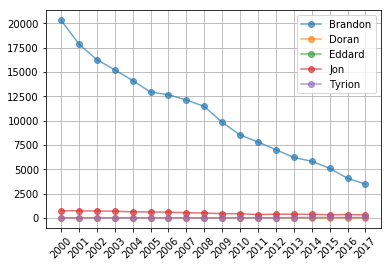

In [37]:
plotList(male_names,"M")
# something weird going on with 2017 on this one when Benjen is included